# KNN Algorithm for Yeast Data


In [50]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd  
from math import floor, ceil, sqrt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [51]:
def the_train_test_split(X, test_ratio = 0.2):
    if(test_ratio >= 1 or test_ratio <0):
        test_ratio = 0.2
    row, _ = X.shape
    train_count = floor(row * (1-test_ratio)) 
    train = X[:train_count]
    test = X[train_count:]
    return train, test

In [52]:
def euclidean_distance(x,y):
    return sqrt(sum(np.square(x-y)))
 
def manhattan_distance(x,y):
    return sum(abs(x - y))
 
def chebyshev_distance(x,y):
    return max(abs(x - y))
 
def minkowski_distance(x,y, p, w):
    return sum(w * abs(x - y)^p)^(1/p)
 
def get_distance(x, y, algorithm ="euclidean"):
    '''
    three valid metrics:
    euclidean:
        sqrt(sum(np.square(x-y)))
    manhattan:
        return sum(abs(x - y))
        
    chebyshev:
        max(abs(x - y))
 
    '''
    if(algorithm == "euclidean"):
        return euclidean_distance(x,y)
    elif(algorithm == "manhattan"):
        return manhattan_distance(x,y)
    elif(algorithm == "chebyshev"):
        return chebyshev_distance(x,y)
    else:
        #print("The algorithm ", algorithm, " couldn't be recognized.\n", "\"euclidean\" algorithm is used instead")
        return euclidean_distance(x,y)
 

In [53]:
class K_Neigbours_Classifier():
    def __init__(self, neigbour_count = 7, algorithm = "euclidean"):
        self.alg = algorithm
        self.n_count = neigbour_count
 
    def fit(self, train_input, train_output):
        self.train_in = train_input
        self.train_out = train_output
        #
        pd.unique(self.train_out) # since it is array of arrays sized 1
        self.categories = pd.unique(self.train_out.ravel())
   
    def predict(self, single):
        # calculate the distances
        distances = np.apply_along_axis(get_distance, 1, self.train_in, y=single, algorithm=self.alg)
        #print(distances)
        nearest_indices = np.argpartition(distances, self.n_count)[:self.n_count]
        #print(nearest_indices)
        category_dict = dict.fromkeys(self.categories, 0)
        nearest_keys = self.train_out[nearest_indices]
        for neigbour_key in nearest_keys:
            category_dict[neigbour_key] = 1 + category_dict[neigbour_key]
        the_key_with_max = max(category_dict, key=category_dict.get)
        #print("We predict this one to be: ", the_key_with_max)
        return the_key_with_max

In [54]:
def measure(X_train, Y_train, X_test, Y_test, neigbour_count=13, algorithm="manhattan", output=True ):
    knc = K_Neigbours_Classifier(neigbour_count=neigbour_count, algorithm=algorithm)
    knc.fit(X_train, Y_train[:,0]) # we know that y_train is 1 dimensional 
    correct_pred = 0
    incorrect_pred = 0
    correct_pred_dict = dict.fromkeys(cat,0)
    failed_to_pred_dict = dict.fromkeys(cat,0)
    assumed_to_pred_dict = dict.fromkeys(cat,0)

    predictions = [] #= np.empty(Y_test.size,  dtype="S3")
    for i in range (Y_test.size):
        correct_key = Y_test[i][0]
        predicted_key =knc.predict(X_test[i])
        predictions.append(predicted_key)
        if(  predicted_key== correct_key):
            correct_pred = 1 + correct_pred
            correct_pred_dict[correct_key] = 1 + correct_pred_dict[correct_key]

        else:
            incorrect_pred = 1 + incorrect_pred
            failed_to_pred_dict[correct_key] = 1 + failed_to_pred_dict[correct_key]
            assumed_to_pred_dict[predicted_key] = 1 + assumed_to_pred_dict[predicted_key] 
    accuracy = correct_pred/(correct_pred + incorrect_pred)
    if output:
        print("Accuracy: ", correct_pred/(correct_pred + incorrect_pred) )
        print("Number of correct predictions: ", correct_pred)
        print("Number of incorrect predictions: ", incorrect_pred)
        print("correct predict(ion) count:\n", correct_pred_dict)
        print("failed_to predict(ion) count:\n", failed_to_pred_dict)
        print("assumed_to predict(ion) count:\n", assumed_to_pred_dict)
        

        print("\n                   Classification Report                  \n",
        classification_report(Y_test, predictions, zero_division=1)) # ignores zero division warning
        
        ConfusionMatrixDisplay.from_predictions(Y_test, predictions)
        plt.show()
    return accuracy

## Read the data

In [55]:
file_name = "yeast.csv" 
md = pd.read_csv(file_name)

# md.dropna(inplace = True)
# md.replace('unknown', 0, inplace = True)
md.head()


,DBName,1,2,3,4,5,6,7,8,OutName
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


## Prepare the data
* Separate the input and output variables
* Seperate the data into training and test sets
* Normalize the data


In [56]:
# Shuffle the data to get more fair representative
md = md.reindex(np.random.permutation(md.index))

test_ratio = 0.2
X = md.values[:,1:9]
Y = md.values[:,9:]
cat = pd.unique(Y[:,0])

# normalize X:
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - X[:,i].mean())/X[:,i].std()

In [57]:
X_train, X_test = the_train_test_split(X, test_ratio = test_ratio)
Y_train, Y_test = the_train_test_split(Y, test_ratio = test_ratio)

Accuracy:  0.5656565656565656
Number of correct predictions:  168
Number of incorrect predictions:  129
correct predict(ion) count:
 {'CYT': 68, 'NUC': 38, 'ME2': 4, 'ME3': 17, 'MIT': 25, 'VAC': 0, 'EXC': 6, 'POX': 1, 'ME1': 9, 'ERL': 0}
failed_to predict(ion) count:
 {'CYT': 23, 'NUC': 46, 'ME2': 10, 'ME3': 10, 'MIT': 26, 'VAC': 4, 'EXC': 4, 'POX': 2, 'ME1': 3, 'ERL': 1}
assumed_to predict(ion) count:
 {'CYT': 70, 'NUC': 24, 'ME2': 3, 'ME3': 11, 'MIT': 14, 'VAC': 0, 'EXC': 3, 'POX': 0, 'ME1': 4, 'ERL': 0}

                   Classification Report                  
               precision    recall  f1-score   support

         CYT       0.49      0.75      0.59        91
         ERL       1.00      0.00      0.00         1
         EXC       0.67      0.60      0.63        10
         ME1       0.69      0.75      0.72        12
         ME2       0.57      0.29      0.38        14
         ME3       0.61      0.63      0.62        27
         MIT       0.64      0.49      0.56     

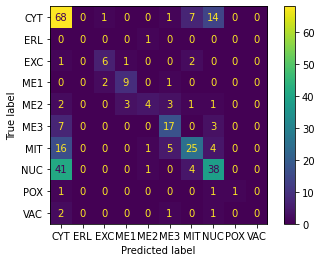

0.5656565656565656

In [58]:
measure(X_train, Y_train, X_test, Y_test, neigbour_count=25, algorithm="manhattan")

Accuracy:  0.5488215488215489
Number of correct predictions:  163
Number of incorrect predictions:  134
correct predict(ion) count:
 {'CYT': 60, 'NUC': 41, 'ME2': 3, 'ME3': 16, 'MIT': 25, 'VAC': 0, 'EXC': 6, 'POX': 2, 'ME1': 9, 'ERL': 1}
failed_to predict(ion) count:
 {'CYT': 31, 'NUC': 43, 'ME2': 11, 'ME3': 11, 'MIT': 26, 'VAC': 4, 'EXC': 4, 'POX': 1, 'ME1': 3, 'ERL': 0}
assumed_to predict(ion) count:
 {'CYT': 65, 'NUC': 32, 'ME2': 2, 'ME3': 13, 'MIT': 15, 'VAC': 0, 'EXC': 2, 'POX': 0, 'ME1': 5, 'ERL': 0}

                   Classification Report                  
               precision    recall  f1-score   support

         CYT       0.48      0.66      0.56        91
         ERL       1.00      1.00      1.00         1
         EXC       0.75      0.60      0.67        10
         ME1       0.64      0.75      0.69        12
         ME2       0.60      0.21      0.32        14
         ME3       0.55      0.59      0.57        27
         MIT       0.62      0.49      0.55     

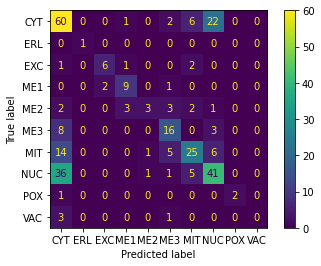

0.5488215488215489

In [59]:
measure(X_train, Y_train, X_test, Y_test, neigbour_count=13, algorithm="manhattan")

## Cross Validation to tune parameters

Firstly, we will tune $\lambda$ for each metric,\
then we will compare the best accuracy rates of metrics (which are in those $lambda$ values).

In [60]:
def cross_validate_knn(X_train, Y_train, min_lambda= 1, max_lambda=None, algorithm="manhattan", fold_k=10):
    size = ceil( X_train.shape[0]/fold_k)
    if max_lambda is None:
        max_lambda = floor(X_train.shape[0]/fold_k) # better to be sorry than  safe
    if min_lambda % 2 == 0:
        min_lambda = min_lambda + 1
    
    acc = {}
    ind = 0;
    for l in range(min_lambda, 1+max_lambda, 2):
        acc[l] = np.zeros(fold_k)
        for i in range(fold_k):
            x_tr = np.concatenate((X_train[0: i*size],X_train[(1+i)*size:]  ))
            x_te = X_train[i*size:(1+i)*size]
            y_tr = np.concatenate((Y_train[0: i*size],Y_train[(1+i)*size:]  ))
            y_te = Y_train[i*size:(1+i)*size]
            #print(y_te[:10])

            acc[l][i] = measure(x_tr,y_tr,x_te,y_te, neigbour_count=l, algorithm=algorithm, output=False)
        print( "l: ",l, " acc: ",acc[l], "avg ", np.mean(acc[l]))
        ind = ind+1
    return acc

### Tuning lambda for Manhattan metric 

In [61]:
man_cv = cross_validate_knn(X_train, Y_train, min_lambda= 1, max_lambda=35, algorithm="manhattan", fold_k=10)

l:  1  acc:  [0.50420168 0.54621849 0.54621849 0.49579832 0.57983193 0.55462185
 0.49579832 0.50420168 0.48739496 0.53448276] avg  0.5248768472906403
l:  3  acc:  [0.54621849 0.5210084  0.54621849 0.56302521 0.58823529 0.54621849
 0.5210084  0.55462185 0.5210084  0.53448276] avg  0.5442045783830773
l:  5  acc:  [0.57142857 0.5210084  0.57983193 0.58823529 0.57142857 0.55462185
 0.57983193 0.52941176 0.57142857 0.5       ] avg  0.5567226890756303
l:  7  acc:  [0.6302521  0.53781513 0.60504202 0.6302521  0.53781513 0.61344538
 0.60504202 0.57983193 0.56302521 0.55172414] avg  0.5854245146334395
l:  9  acc:  [0.63865546 0.52941176 0.60504202 0.58823529 0.56302521 0.62184874
 0.61344538 0.61344538 0.59663866 0.51724138] avg  0.5886989278470008
l:  11  acc:  [0.63865546 0.56302521 0.61344538 0.59663866 0.55462185 0.63865546
 0.60504202 0.57983193 0.55462185 0.52586207] avg  0.5870399884091568
l:  13  acc:  [0.58823529 0.54621849 0.6302521  0.55462185 0.57983193 0.61344538
 0.61344538 0.5882

In [62]:
man_best_l = -1
man_best_acc = 0
for l, arr in man_cv.items():
    m =np.mean(arr) 
    if  m> man_best_acc:
        man_best_l, man_best_acc = l, m
    print(l, " : ",m)
    
print("Best accuracy was: ", man_best_acc, " when lambda=", man_best_l)
#print(np.argmax(man_cv))

1  :  0.5248768472906403
3  :  0.5442045783830773
5  :  0.5567226890756303
7  :  0.5854245146334395
9  :  0.5886989278470008
11  :  0.5870399884091568
13  :  0.5838090408577223
15  :  0.5980947551434366
17  :  0.5955954795711388
19  :  0.590509997102289
21  :  0.6022747029846421
23  :  0.5997971602434077
25  :  0.5997536945812807
27  :  0.5955302810779484
29  :  0.5930527383367139
31  :  0.5922124022022602
33  :  0.5938713416401044
35  :  0.5862865835989568
Best accuracy was:  0.6022747029846421  when lambda= 21


Accuracy:  0.5589225589225589
Number of correct predictions:  166
Number of incorrect predictions:  131
correct predict(ion) count:
 {'CYT': 66, 'NUC': 37, 'ME2': 4, 'ME3': 16, 'MIT': 26, 'VAC': 0, 'EXC': 6, 'POX': 2, 'ME1': 8, 'ERL': 1}
failed_to predict(ion) count:
 {'CYT': 25, 'NUC': 47, 'ME2': 10, 'ME3': 11, 'MIT': 25, 'VAC': 4, 'EXC': 4, 'POX': 1, 'ME1': 4, 'ERL': 0}
assumed_to predict(ion) count:
 {'CYT': 69, 'NUC': 27, 'ME2': 1, 'ME3': 12, 'MIT': 14, 'VAC': 0, 'EXC': 4, 'POX': 0, 'ME1': 4, 'ERL': 0}

                   Classification Report                  
               precision    recall  f1-score   support

         CYT       0.49      0.73      0.58        91
         ERL       1.00      1.00      1.00         1
         EXC       0.60      0.60      0.60        10
         ME1       0.67      0.67      0.67        12
         ME2       0.80      0.29      0.42        14
         ME3       0.57      0.59      0.58        27
         MIT       0.65      0.51      0.57     

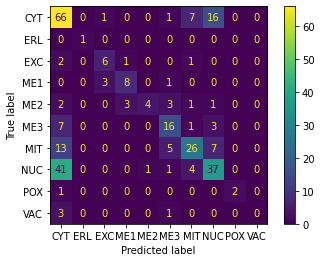

0.5589225589225589

In [68]:
measure(X_train, Y_train, X_test, Y_test, neigbour_count=man_best_l, algorithm="manhattan")

### Tuning lambda for Euclidean metric

In [63]:
euc_cv = cross_validate_knn(X_train, Y_train, min_lambda= 1, max_lambda=35, algorithm="euclidean", fold_k=10)

l:  1  acc:  [0.52941176 0.57142857 0.55462185 0.56302521 0.56302521 0.51260504
 0.50420168 0.4789916  0.50420168 0.5       ] avg  0.5281512605042017
l:  3  acc:  [0.56302521 0.57983193 0.59663866 0.57983193 0.57983193 0.56302521
 0.57142857 0.56302521 0.52941176 0.55172414] avg  0.5677774558099101
l:  5  acc:  [0.59663866 0.54621849 0.62184874 0.56302521 0.52941176 0.57142857
 0.57983193 0.57142857 0.58823529 0.53448276] avg  0.5702549985511445
l:  7  acc:  [0.59663866 0.56302521 0.60504202 0.6302521  0.61344538 0.54621849
 0.57142857 0.61344538 0.59663866 0.52586207] avg  0.5861996522747028
l:  9  acc:  [0.62184874 0.53781513 0.58823529 0.57983193 0.59663866 0.61344538
 0.57983193 0.60504202 0.59663866 0.50862069] avg  0.582794842074761
l:  11  acc:  [0.64705882 0.55462185 0.57983193 0.58823529 0.61344538 0.60504202
 0.60504202 0.62184874 0.56302521 0.51724138] avg  0.5895392639814547
l:  13  acc:  [0.64705882 0.57983193 0.59663866 0.58823529 0.57142857 0.58823529
 0.60504202 0.61344

In [64]:
euc_best_l = -1
euc_best_acc = 0
for l, arr in euc_cv.items():
    m =np.mean(arr) 
    if  m> euc_best_acc:
        euc_best_l, euc_best_acc = l, m
    print(l, " : ",m)
    
print("Best accuracy was: ", euc_best_acc, " when lambda=", euc_best_l)
#print(np.argmax(euc_cv))

1  :  0.5281512605042017
3  :  0.5677774558099101
5  :  0.5702549985511445
7  :  0.5861996522747028
9  :  0.582794842074761
11  :  0.5895392639814547
13  :  0.589604462474645
15  :  0.5955302810779484
17  :  0.5989350912778905
19  :  0.5989350912778905
21  :  0.5963923500434656
23  :  0.5947551434366851
25  :  0.5947116777745581
27  :  0.5955520139090119
29  :  0.6039771080846131
31  :  0.5904882642712257
33  :  0.5820849029266879
35  :  0.5829252390611416
Best accuracy was:  0.6039771080846131  when lambda= 29


Accuracy:  0.5353535353535354
Number of correct predictions:  159
Number of incorrect predictions:  138
correct predict(ion) count:
 {'CYT': 63, 'NUC': 38, 'ME2': 4, 'ME3': 17, 'MIT': 24, 'VAC': 0, 'EXC': 5, 'POX': 0, 'ME1': 8, 'ERL': 0}
failed_to predict(ion) count:
 {'CYT': 28, 'NUC': 46, 'ME2': 10, 'ME3': 10, 'MIT': 27, 'VAC': 4, 'EXC': 5, 'POX': 3, 'ME1': 4, 'ERL': 1}
assumed_to predict(ion) count:
 {'CYT': 75, 'NUC': 30, 'ME2': 1, 'ME3': 12, 'MIT': 10, 'VAC': 0, 'EXC': 4, 'POX': 0, 'ME1': 6, 'ERL': 0}

                   Classification Report                  
               precision    recall  f1-score   support

         CYT       0.46      0.69      0.55        91
         ERL       1.00      0.00      0.00         1
         EXC       0.56      0.50      0.53        10
         ME1       0.57      0.67      0.62        12
         ME2       0.80      0.29      0.42        14
         ME3       0.59      0.63      0.61        27
         MIT       0.71      0.47      0.56     

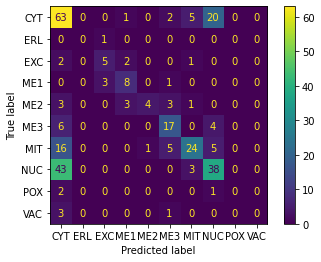

0.5353535353535354

In [67]:
measure(X_train, Y_train, X_test, Y_test, neigbour_count=euc_best_l, algorithm="euclidean")

### Tuning lambda for Chebyshev metric

In [65]:
cheb_cv = cross_validate_knn(X_train, Y_train, min_lambda= 1, max_lambda=35, algorithm="chebyshev", fold_k=10)

l:  1  acc:  [0.53781513 0.51260504 0.5210084  0.57983193 0.57983193 0.51260504
 0.52941176 0.4789916  0.43697479 0.50862069] avg  0.5197696319907273
l:  3  acc:  [0.54621849 0.57142857 0.53781513 0.54621849 0.56302521 0.57983193
 0.54621849 0.55462185 0.53781513 0.55172414] avg  0.5534917415241959
l:  5  acc:  [0.56302521 0.56302521 0.60504202 0.60504202 0.52941176 0.55462185
 0.61344538 0.58823529 0.51260504 0.49137931] avg  0.5625833091857432
l:  7  acc:  [0.56302521 0.53781513 0.57142857 0.60504202 0.55462185 0.57142857
 0.61344538 0.61344538 0.53781513 0.54310345] avg  0.5711170675166618
l:  9  acc:  [0.54621849 0.55462185 0.63865546 0.59663866 0.54621849 0.57983193
 0.60504202 0.58823529 0.56302521 0.54310345] avg  0.5761590843233845
l:  11  acc:  [0.54621849 0.57983193 0.62184874 0.57983193 0.57142857 0.57142857
 0.59663866 0.58823529 0.55462185 0.53448276] avg  0.5744566792234134
l:  13  acc:  [0.57983193 0.57142857 0.61344538 0.63865546 0.53781513 0.57983193
 0.61344538 0.5798

In [66]:
che_best_l = -1
che_best_acc = 0
for l, arr in cheb_cv.items():
    m =np.mean(arr) 
    if  m> che_best_acc:
        che_best_l, che_best_acc = l, m
    print(l, " : ",m)
    
print("Best accuracy was: ", che_best_acc, " when lambda=", che_best_l)
print(np.argmax(cheb_cv))

1  :  0.5197696319907273
3  :  0.5534917415241959
5  :  0.5625833091857432
7  :  0.5711170675166618
9  :  0.5761590843233845
11  :  0.5744566792234134
13  :  0.5769342219646479
15  :  0.5777310924369747
17  :  0.5803390321645899
19  :  0.5828383077368877
21  :  0.5820197044334975
23  :  0.5862213851057664
25  :  0.5761373514923209
27  :  0.5710953346855983
29  :  0.5694146624166907
31  :  0.5677339901477831
33  :  0.5711170675166619
35  :  0.574478412054477
Best accuracy was:  0.5862213851057664  when lambda= 23
0


Accuracy:  0.531986531986532
Number of correct predictions:  158
Number of incorrect predictions:  139
correct predict(ion) count:
 {'CYT': 61, 'NUC': 41, 'ME2': 2, 'ME3': 16, 'MIT': 25, 'VAC': 0, 'EXC': 4, 'POX': 3, 'ME1': 6, 'ERL': 0}
failed_to predict(ion) count:
 {'CYT': 30, 'NUC': 43, 'ME2': 12, 'ME3': 11, 'MIT': 26, 'VAC': 4, 'EXC': 6, 'POX': 0, 'ME1': 6, 'ERL': 1}
assumed_to predict(ion) count:
 {'CYT': 73, 'NUC': 31, 'ME2': 1, 'ME3': 12, 'MIT': 16, 'VAC': 0, 'EXC': 2, 'POX': 0, 'ME1': 4, 'ERL': 0}

                   Classification Report                  
               precision    recall  f1-score   support

         CYT       0.46      0.67      0.54        91
         ERL       1.00      0.00      0.00         1
         EXC       0.67      0.40      0.50        10
         ME1       0.60      0.50      0.55        12
         ME2       0.67      0.14      0.24        14
         ME3       0.57      0.59      0.58        27
         MIT       0.61      0.49      0.54      

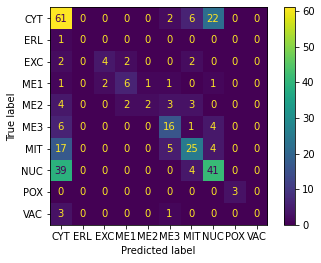

0.531986531986532

In [69]:
measure(X_train, Y_train, X_test, Y_test, neigbour_count=che_best_l, algorithm="chebyshev")